# LINEAR REGRESSION MODEL B

In [2]:
#Abrir csv del conjunto de datos limpio
import pandas as pd
df_copy_2_interpolado_copy_sin_outliers = pd.read_csv('dataset_limpio_B.csv', sep=",")
df_copy_2_interpolado_copy_sin_outliers

,Año,Mes,Día,Hora,Minuto,B_Optimal - Power DC [W],Ambient Temperature [ºC],Global Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º]
0,2014,1,1,7,41,2.388366,9.700000,7.131149,0.751824,0.700000,275.333840
1,2014,1,1,7,42,2.388366,9.700000,7.040442,0.781930,0.666667,278.503060
2,2014,1,1,7,43,1.173375,9.700000,6.594407,0.813929,0.616667,284.667120
3,2014,1,1,7,44,1.278375,9.700000,7.358729,0.849919,0.666667,278.666660
4,2014,1,1,7,45,1.325625,9.700000,7.470711,0.886891,0.633333,272.666360
...,...,...,...,...,...,...,...,...,...,...,...
616347,2016,12,29,17,27,0.731250,15.200000,6.546354,0.836866,0.683333,90.670424
616348,2016,12,29,17,28,0.731250,15.200000,6.481665,0.801994,0.833333,87.849608
616349,2016,12,29,17,29,0.731250,15.200000,4.924317,0.766211,0.883333,84.505200
616350,2016,12,29,17,30,0.731250,15.133332,5.480427,0.740643,0.783333,72.378000


In [3]:
df_copy_2_interpolado_copy_sin_outliers.isna().sum()

Año                         0
Mes                         0
Día                         0
Hora                        0
Minuto                      0
B_Optimal - Power DC [W]    0
Ambient Temperature [ºC]    0
Global Radiation [W/m2]     0
Ultraviolet [W/m2]          0
Wind Velocity [m/s]         0
Wind Direction [º]          0
dtype: int64

## 1. Particionado datos ML

In [4]:
#PARTICIONADO DEL CONJUNTO DE DATOS: DF
# Construcción de una función que realice el particionado completo

from sklearn.model_selection import train_test_split

def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

df = df_copy_2_interpolado_copy_sin_outliers
# División del conjunto de datos 
train_set, val_set, test_set = train_val_test_split(df)

print("Longitud del conjunto de datos:", len(df))
print("Longitud del Training Set:", len(train_set))
print("Longitud del Validation Set:", len(val_set))
print("Longitud del Test Set:", len(test_set))

Longitud del conjunto de datos: 616352
Longitud del Training Set: 369811
Longitud del Validation Set: 123270
Longitud del Test Set: 123271


In [5]:
def preparar_datos(df, prototipo):
    """
    Función para preparar datos de entrenamiento, validación y prueba
    para diferentes prototipos.
    
    Parámetros:
    df (DataFrame): El conjunto de datos de entrada.
    prototipo (str): El prototipo ('A' o 'B').
        
    Retorna:
    tuple: DataFrames X_train, y_train, X_val, y_val, X_test, y_test.
    """
    columna_objetivo = f"{prototipo}_Optimal - Power DC [W]"
    
    X_train = train_set.drop(columna_objetivo, axis=1)
    y_train = train_set[columna_objetivo].copy()
    
    X_val = val_set.drop(columna_objetivo, axis=1)
    y_val = val_set[columna_objetivo].copy()
    
    X_test = test_set.drop(columna_objetivo, axis=1)
    y_test = test_set[columna_objetivo].copy()
    
    return X_train, y_train, X_val, y_val, X_test, y_test

prototipo_seleccionado = 'B'
# Preparar los datos basados en la selección del usuario
X_train, y_train, X_val, y_val, X_test, y_test = preparar_datos(df, prototipo_seleccionado)

X_train = X_train.sort_index()
y_train = y_train.sort_index()
X_val = X_val.sort_index()
y_val = y_val.sort_index()
X_test = X_test.sort_index()
y_test= y_test.sort_index()

Text(0.5, 1.0, 'Pruebas - B_Optimal - Power DC [W]')

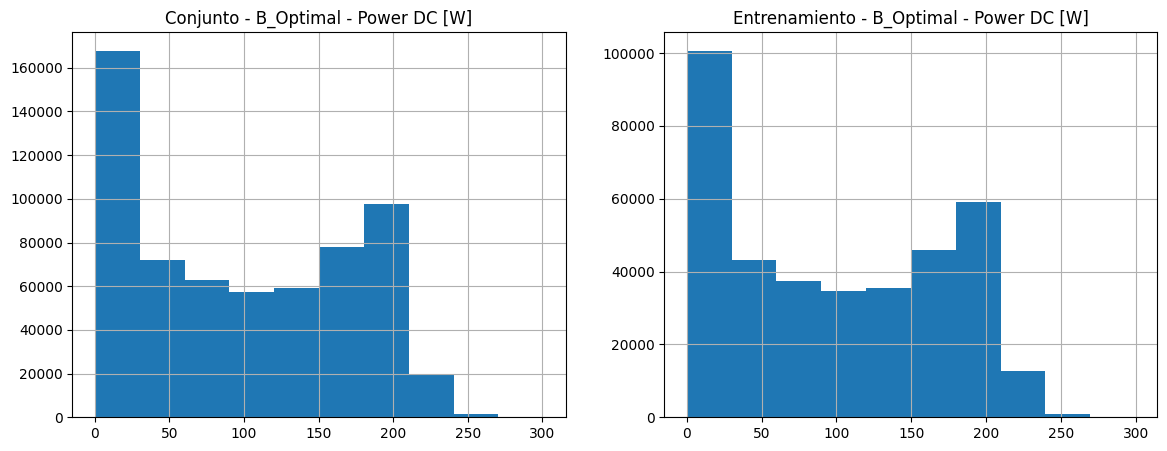

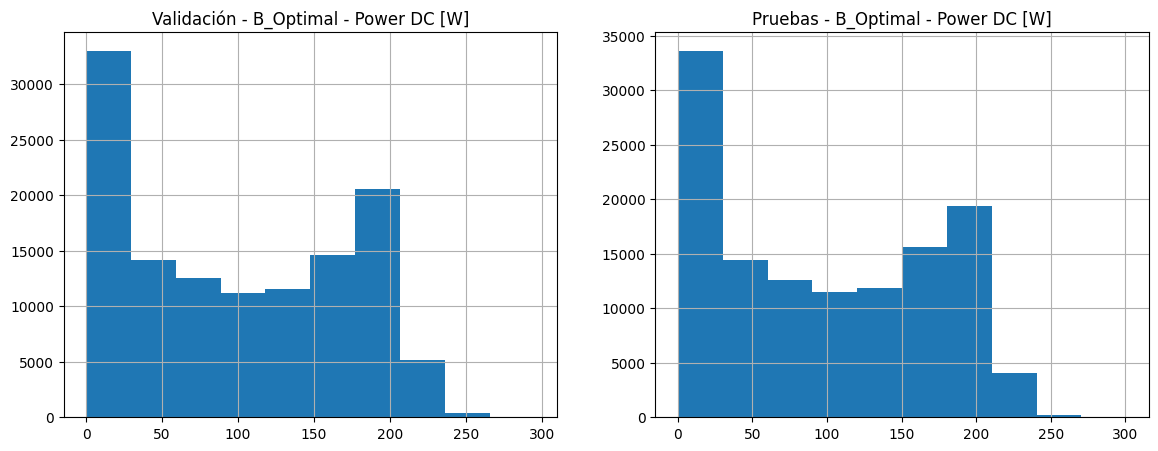

In [6]:
import matplotlib.pyplot as plt
# Comprobación de que stratify mantiene la proporcion de la característica en los conjuntos
plt.figure(figsize=(14, 5))

plt.subplot(121)
df["B_Optimal - Power DC [W]"].hist()
plt.title('Conjunto - B_Optimal - Power DC [W]')

plt.subplot(122)
train_set["B_Optimal - Power DC [W]"].hist()
plt.title('Entrenamiento - B_Optimal - Power DC [W]')


plt.figure(figsize=(14, 5))
plt.subplot(121)
val_set["B_Optimal - Power DC [W]"].hist()
plt.title('Validación - B_Optimal - Power DC [W]')

plt.subplot(122)
test_set["B_Optimal - Power DC [W]"].hist()
plt.title('Pruebas - B_Optimal - Power DC [W]')

#se mantiene la proporción.

# 2. Copia de conjunto particionado

In [7]:
X_train_copy = X_train.copy()
X_val_copy = X_val.copy()
X_test_copy = X_test.copy()

y_train_copy = y_train.copy()
y_val_copy = y_val.copy()
y_test_copy = y_test.copy()

# 3. Escalado de los datos
Se escalarán los datos y se comprobará si escalando se obtienen mejores resultados.

In [8]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train_copy)
y_train_scaled = scaler.fit_transform(y_train_copy.values.reshape(-1, 1))
X_val_scaled = scaler.fit_transform(X_val_copy)
y_val_scaled = scaler.fit_transform(y_val_copy.values.reshape(-1, 1))
X_test_scaled = scaler.fit_transform(X_test_copy)
y_test_scaled = scaler.fit_transform(y_test_copy.values.reshape(-1, 1))

# Transformación a un DataFrame de Pandas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_copy.columns, index=X_train_copy.index)
y_train_scaled = pd.DataFrame(y_train_scaled, columns=['B_Optimal - Power DC [W]'], index=y_train_copy.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val_copy.columns, index=X_val_copy.index)
y_val_scaled = pd.DataFrame(y_val_scaled, columns=['B_Optimal - Power DC [W]'], index=y_val_copy.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_copy.columns, index=X_test_copy.index)
y_test_scaled = pd.DataFrame(y_test_scaled, columns=['B_Optimal - Power DC [W]'], index=y_test_copy.index)


#DATOS ESCALADOS
# Copiamos el conjunto de datos para no alterar el original
X_train_scaled_copy = X_train_scaled.copy()
y_train_scaled_copy = y_train_scaled.copy()
X_val_scaled_copy = X_val_scaled.copy()
y_val_scaled_copy = y_val_scaled.copy()
X_test_scaled_copy = X_test_scaled.copy()
y_test_scaled_copy = y_test_scaled.copy()
X_train_scaled_copy   #CONJUNTO DE DATOS DE ENTRENAMIENTO ESCALADOS X_train 
X_train_scaled_copy.isna().any()
y_train_scaled_copy   #CONJUNTO DE DATOS DE ENTRENAMIENTO ESCALADOS y_train
y_train_scaled_copy.isna().any()

B_Optimal - Power DC [W]    False
dtype: bool

Tanto los datos escalados como los sin escalar NO tienen valores nulos (NAN)

# 4. Algoritmo: Linear Regression

## Entrenamiento


In [9]:
from sklearn.linear_model import LinearRegression
import time
lin_reg = LinearRegression()

#Entrenamiento del modelo
start_time = time.time()
lin_reg.fit(X_train_copy, y_train_copy)
end_time = time.time()
print(f"Tiempo de entrenamiento para el modelo Linear Regression: {end_time - start_time:.2f} segundos")

Tiempo de entrenamiento para el modelo Linear Regression: 0.09 segundos


## Predicción

In [10]:
start_time = time.time()
## Predecimos con el conjunto de datos de entrenamiento
y_train_pred = lin_reg.predict(X_train_copy)
#Prececimos con el conjunto de validación
y_val_pred = lin_reg.predict(X_val_copy)
#Prececimos con el conjunto de test
y_test_pred = lin_reg.predict(X_test_copy)
end_time = time.time()
print(f"Tiempo de predicción para el modelo Linear Regression: {end_time - start_time:.2f} segundos")

Tiempo de predicción para el modelo Linear Regression: 0.04 segundos


## Métricas

In [11]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluar el modelo con los conjuntos de datos de entrenamiento
mse_train = mean_squared_error(y_train_pred, y_train_copy)
r2_train = r2_score(y_train_pred, y_train_copy)
mae_train = mean_absolute_error(y_train_pred, y_train_copy)

mse_val = mean_squared_error(y_val_pred, y_val_copy)
r2_val = r2_score(y_val_pred, y_val_copy)
mae_val = mean_absolute_error(y_val_pred, y_val_copy)

mse_test = mean_squared_error(y_test_pred, y_test_copy)
r2_test = r2_score(y_test_pred, y_test_copy)
mae_test = mean_absolute_error(y_test_pred, y_test_copy)

print(f"Error Cuadrático Medio (MSE) Train Set: {mse_train:.2f}")
print(f"Coeficiente de Determinación (R^2) Train Set: {r2_train:.2f}")
print(f"Error Absoluto Medio (MAE) Train Set: {mae_train:.2f}")

print(f"Error Cuadrático Medio (MSE) Validation Set: {mse_val:.2f}")
print(f"Coeficiente de Determinación (R^2) Validation Set: {r2_val:.2f}")
print(f"Error Absoluto Medio (MAE) Validation Set: {mae_val:.2f}")

print(f"Error Cuadrático Medio (MSE) Test Set: {mse_test:.2f}")
print(f"Coeficiente de Determinación (R^2) Test Set: {r2_test:.2f}")
print(f"Error Absoluto Medio (MAE) Test Set: {mae_test:.2f}")

Error Cuadrático Medio (MSE) Train Set: 1145.30
Coeficiente de Determinación (R^2) Train Set: 0.72
Error Absoluto Medio (MAE) Train Set: 23.54
Error Cuadrático Medio (MSE) Validation Set: 1138.93
Coeficiente de Determinación (R^2) Validation Set: 0.72
Error Absoluto Medio (MAE) Validation Set: 23.50
Error Cuadrático Medio (MSE) Test Set: 1127.92
Coeficiente de Determinación (R^2) Test Set: 0.73
Error Absoluto Medio (MAE) Test Set: 23.47


In [12]:
import pandas as pd

# Crear un DataFrame con los resultados de las métricas
resultados = pd.DataFrame({
    'Conjunto de Datos': ['Train', 'Validation', 'Test'],
    'MSE Linear Regression': [mse_train, mse_val, mse_test],
    'R^2 Linear Regression': [r2_train, r2_val, r2_test],
    'MAE Linear Regression': [mae_train, mae_val, mae_test]
})

# Mostrar la tabla de resultados
resultados


,Conjunto de Datos,MSE Linear Regression,R^2 Linear Regression,MAE Linear Regression
0,Train,1145.296821,0.720898,23.537833
1,Validation,1138.929107,0.721457,23.499601
2,Test,1127.917939,0.725622,23.468666


## Coeficientes

In [13]:
# Obtener los coeficientes del modelo

# Asegurarnos de que los coeficientes son un array 1D 
coeficientes = lin_reg.coef_.flatten()

coeficientes_df = pd.DataFrame(coeficientes, index=X_train_copy.columns, columns=['Theta 1'])
print(coeficientes_df)

# Parámetro theta 0
print('\nTheta 0: ', lin_reg.intercept_)

                           Theta 1
Año                       2.294354
Mes                       1.945302
Día                       0.033014
Hora                      0.980784
Minuto                    0.019700
Ambient Temperature [ºC] -3.999649
Global Radiation [W/m2]   0.266353
Ultraviolet [W/m2]       -0.720718
Wind Velocity [m/s]       0.946875
Wind Direction [º]       -0.032985

Theta 0:  -4562.40238413342


In [14]:
# Parámetro theta 1
lin_reg.coef_

array([ 2.29435431,  1.94530166,  0.03301384,  0.98078437,  0.01970005,
       -3.99964869,  0.26635253, -0.72071796,  0.9468755 , -0.03298468])

## Gráficas

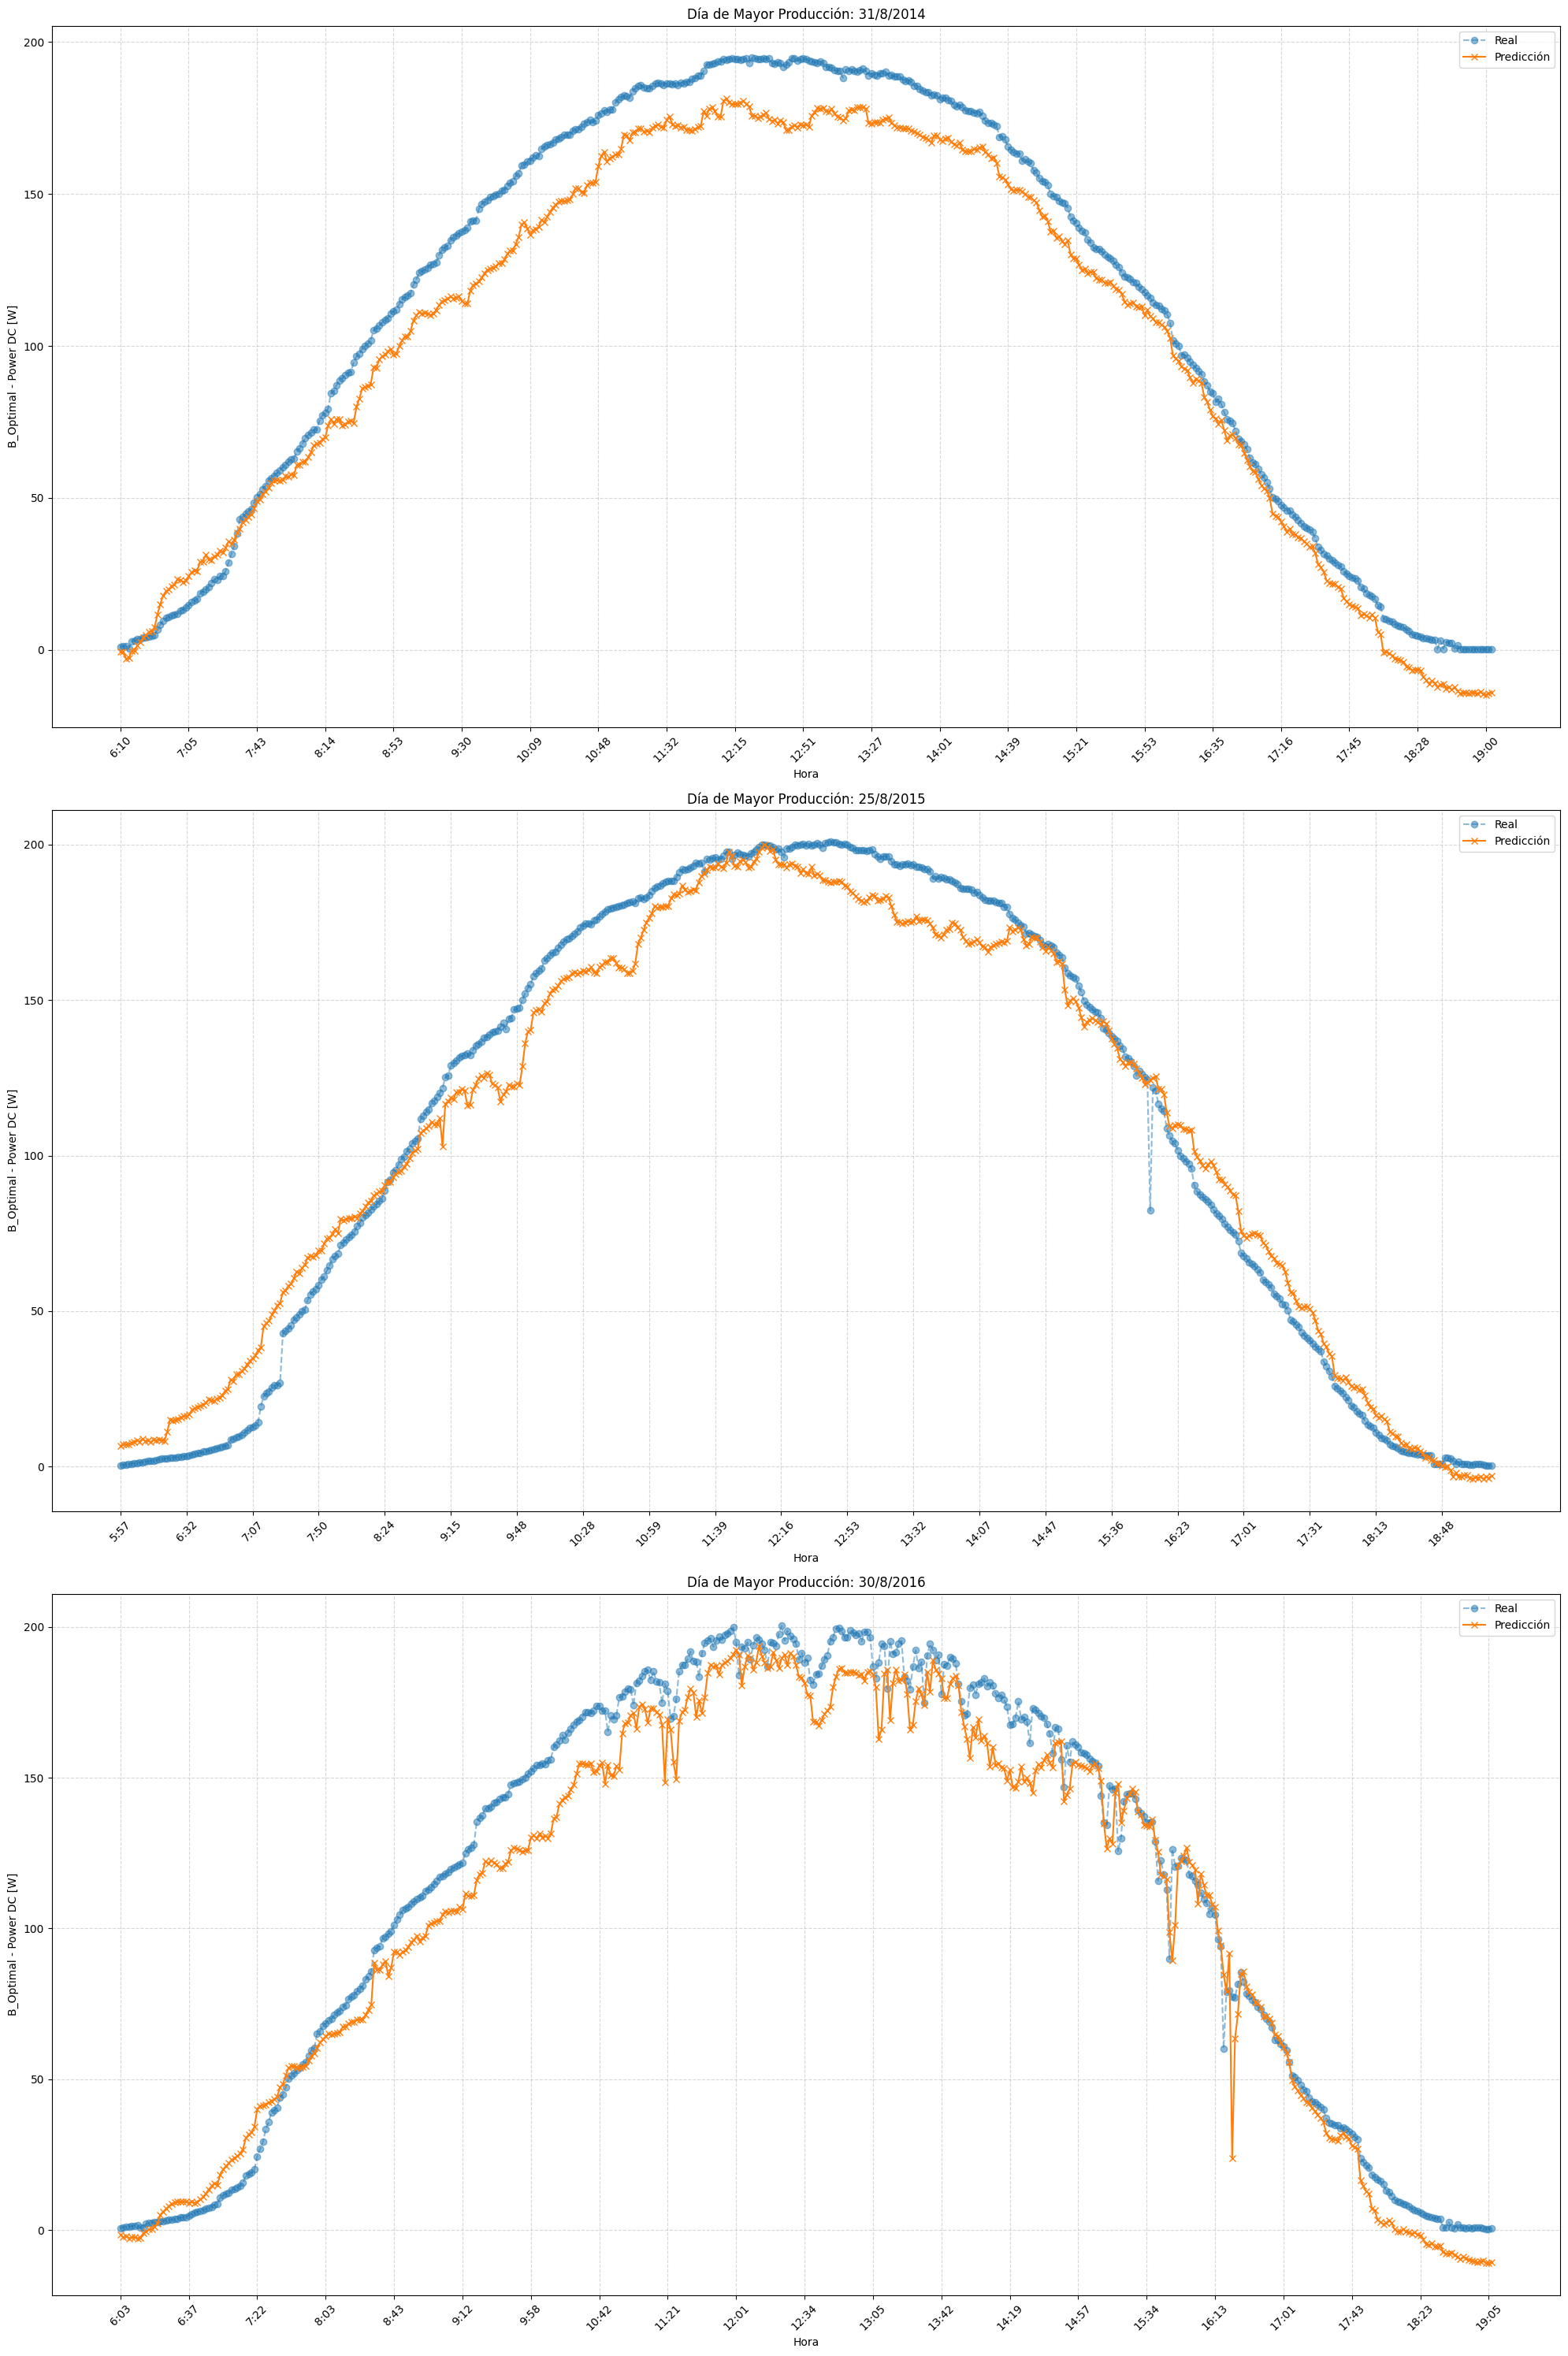

In [15]:
# Crear un DataFrame con los valores reales y predichos
comparacion = pd.DataFrame({
    'Real': y_train_copy.values.flatten(),
    'Predicción': y_train_pred.flatten(),
    'Mes': X_train_copy['Mes'].values.flatten(),
    'Año': X_train_copy['Año'].values.flatten(),
    'Día': X_train_copy['Día'].values.flatten(),
    'Hora': X_train_copy['Hora'].values.flatten(),
    'Minuto': X_train_copy['Minuto'].values.flatten()
})

# Encontrar el día de mayor producción de agosto para cada año
dias_mayor_produccion = {}
for year in [2014, 2015, 2016]:
    mes_agosto = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 8)]
    dia_mayor_produccion = mes_agosto.groupby('Día')['Real'].sum().idxmax()
    dias_mayor_produccion[year] = dia_mayor_produccion

# Crear la gráfica
fig, axes = plt.subplots(3, 1, figsize=(20, 30))

for i, year in enumerate([2014, 2015, 2016]):
    dia_mayor_produccion = dias_mayor_produccion[year]
    datos_dia_mayor = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 8) & (comparacion['Día'] == dia_mayor_produccion)]
    
    # Extraer las horas y minutos
    horas_minutos = datos_dia_mayor[['Hora', 'Minuto']].values
    vector_horas_minutos = [f"{int(hora)}:{int(minuto):02d}" for hora, minuto in horas_minutos]
    
    # Gráfica para el día de mayor producción de cada año
    ax = axes[i]
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real', marker="o", linestyle="dashed", alpha=0.5)
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción'], label='Predicción', marker="x", linestyle="-")
    ax.set_title(f'Día de Mayor Producción: {int(dia_mayor_produccion)}/8/{year}')
    ax.set_xlabel('Hora')
    ax.set_ylabel('B_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)

plt.tight_layout()
plt.show()

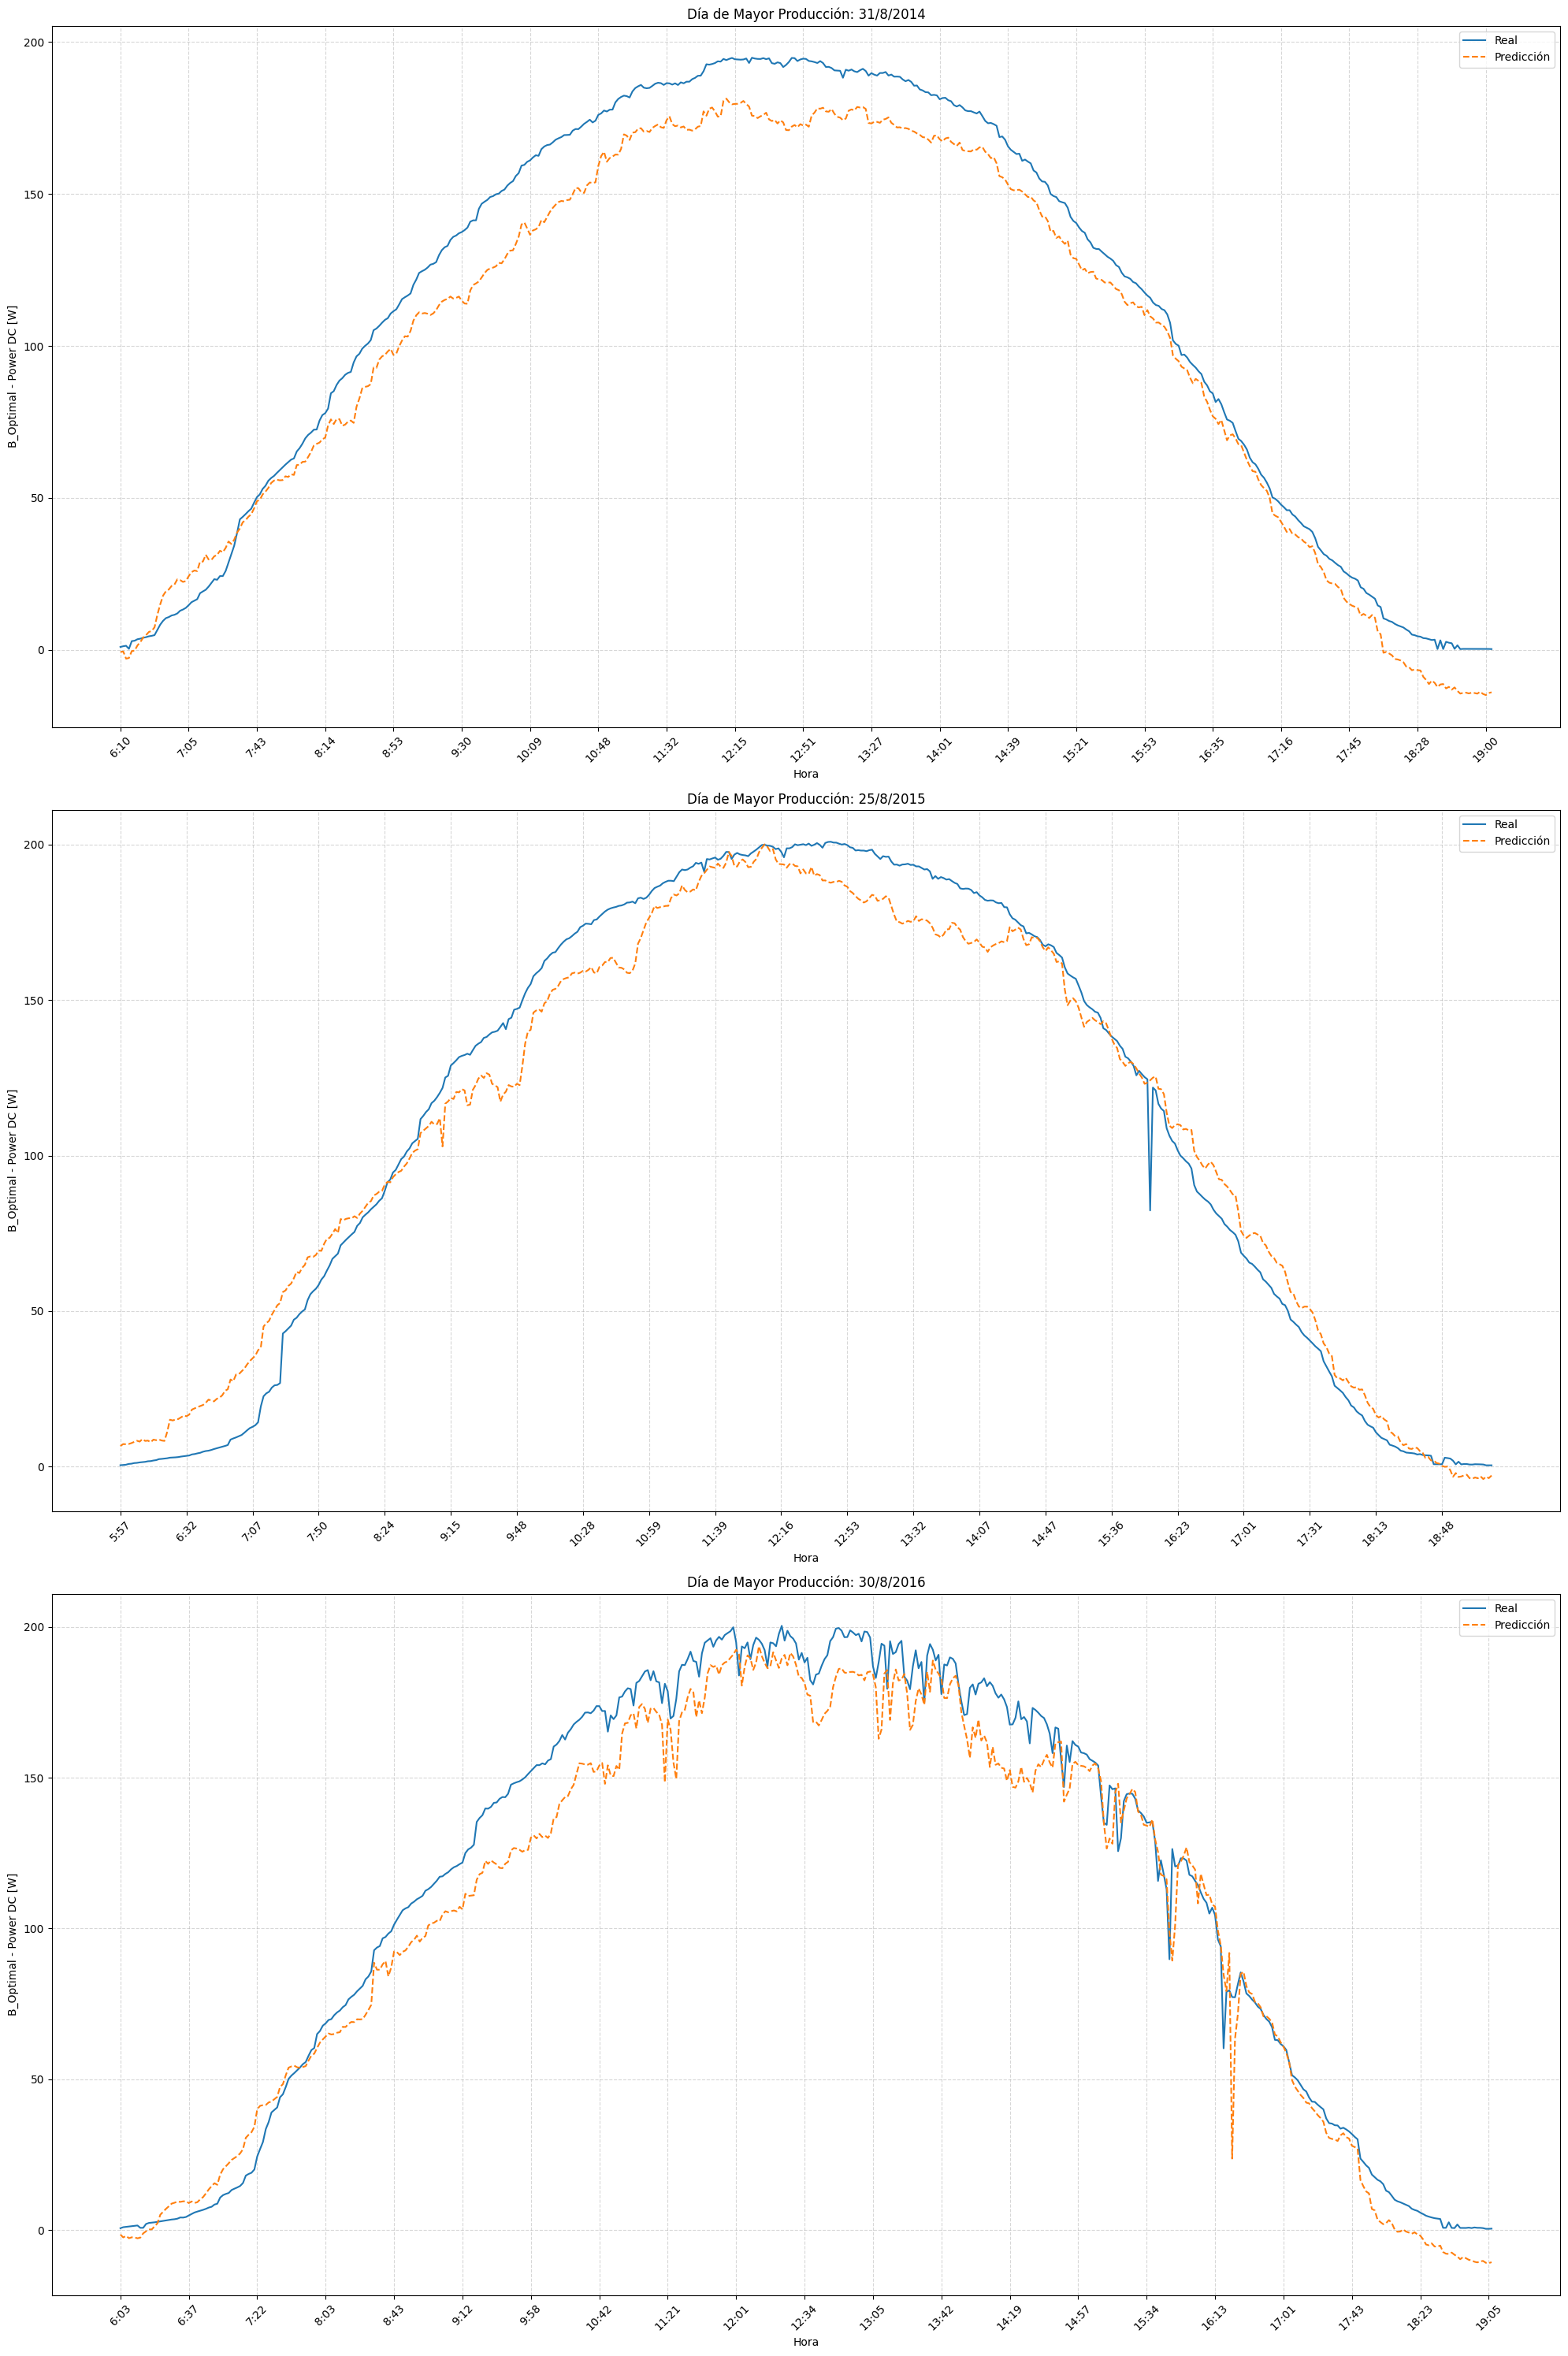

In [16]:
# Crear un DataFrame con los valores reales y predichos
comparacion = pd.DataFrame({
    'Real': y_train_copy.values.flatten(),
    'Predicción': y_train_pred.flatten(),
    'Mes': X_train_copy['Mes'].values.flatten(),
    'Año': X_train_copy['Año'].values.flatten(),
    'Día': X_train_copy['Día'].values.flatten(),
    'Hora': X_train_copy['Hora'].values.flatten(),
    'Minuto': X_train_copy['Minuto'].values.flatten()
})

# Encontrar el día de mayor producción de agosto para cada año
dias_mayor_produccion = {}
for year in [2014, 2015, 2016]:
    mes_agosto = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 8)]
    dia_mayor_produccion = mes_agosto.groupby('Día')['Real'].sum().idxmax()
    dias_mayor_produccion[year] = dia_mayor_produccion

# Crear la gráfica
fig, axes = plt.subplots(3, 1, figsize=(20, 30))

for i, year in enumerate([2014, 2015, 2016]):
    dia_mayor_produccion = dias_mayor_produccion[year]
    datos_dia_mayor = comparacion[(comparacion['Año'] == year) & (comparacion['Mes'] == 8) & (comparacion['Día'] == dia_mayor_produccion)]
    
    # Extraer las horas y minutos
    horas_minutos = datos_dia_mayor[['Hora', 'Minuto']].values
    vector_horas_minutos = [f"{int(hora)}:{int(minuto):02d}" for hora, minuto in horas_minutos]
    
    # Gráfica para el día de mayor producción de cada año
    ax = axes[i]
    ax.plot(vector_horas_minutos, datos_dia_mayor['Real'], label='Real', linestyle="solid")
    ax.plot(vector_horas_minutos, datos_dia_mayor['Predicción'], label='Predicción', linestyle="--")
    ax.set_title(f'Día de Mayor Producción: {int(dia_mayor_produccion)}/8/{year}')
    ax.set_xlabel('Hora')
    ax.set_ylabel('B_Optimal - Power DC [W]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(range(0, len(vector_horas_minutos), 24))
    ax.set_xticklabels(vector_horas_minutos[::24], rotation=45)

plt.tight_layout()
plt.show()

In [17]:
#Guardar el modelo de LinearRegression_model
import joblib
joblib.dump(lin_reg, 'model_B_LinearRegression.pkl')

['model_B_LinearRegression.pkl']

# 5. Energía

In [18]:
import numpy as np
import pandas as pd

# Implementación manual del método de Simpson
def simpson_manual(y, x):
    n = len(x)
    if n < 2:
        raise ValueError("Se necesitan al menos dos puntos para calcular el área.")

    if len(y) != n:
        raise ValueError("El tamaño de los vectores x e y debe ser el mismo.")

    h = (x[-1] - x[0]) / (n - 1)  # Tamaño de los intervalos

    # Aplicar la regla de Simpson
    suma = y[0] + y[-1]  # y0 + yn
    for i in range(1, n - 1):
        if i % 2 == 0:
            suma += 2 * y[i]  # Coeficiente 2 para términos pares
        else:
            suma += 4 * y[i]  # Coeficiente 4 para términos impares
    area = h / 3 * suma
    return area

# Crear un DataFrame con los valores reales y predichos
comparacion = pd.DataFrame({
    'Real': y_test_copy.values.flatten(),
    'Predicción': y_test_pred.flatten(),
    'Mes': X_test_copy['Mes'].values.flatten(),
    'Año': X_test_copy['Año'].values.flatten(),
    'Día': X_test_copy['Día'].values.flatten(),
    'Hora': X_test_copy['Hora'].values.flatten(),
    'Minuto': X_test_copy['Minuto'].values.flatten()
})

# Filtrar los datos para los años 2014, 2015 y 2016
datos_filtrados = comparacion[comparacion['Año'].isin([2014, 2015, 2016])]

# Inicializar una lista para almacenar los resultados
resultados_totales = []

# Iterar sobre cada día de los años 2014, 2015 y 2016
for year in [2014, 2015, 2016]:
    for mes in range(1, 13):
        for dia in range(1, 32):
            dia_datos = datos_filtrados[(datos_filtrados['Año'] == year) & (datos_filtrados['Mes'] == mes) & (datos_filtrados['Día'] == dia)]
            if not dia_datos.empty:
                y_real = dia_datos['Real'].values
                y_pred = dia_datos['Predicción'].values
                x = np.arange(len(y_real))
                area_real = simpson_manual(y_real, x)
                area_pred = simpson_manual(y_pred, x)
                error_relativo = abs(area_pred - area_real) / area_real * 100
                mae = np.mean(np.abs(y_real - y_pred))

                resultados_totales.append({
                    'Fecha': f'{dia}/{mes}/{year}',
                    'Modelo': 'Linear Regression',
                    'Área Real': area_real,
                    'Área Predicha': area_pred,
                    'Error Relativo (%)': error_relativo,
                    'MAE': mae
                })

# Crear un DataFrame con los resultados
df_resultados_totales = pd.DataFrame(resultados_totales)

# Mostrar el DataFrame con los resultados
print(df_resultados_totales)

          Fecha             Modelo     Área Real  Área Predicha  \
0      1/1/2014  Linear Regression   6408.428917    5751.899981   
1      2/1/2014  Linear Regression   1538.125417    6565.601735   
2      3/1/2014  Linear Regression   4084.387167    6211.750565   
3      4/1/2014  Linear Regression   6863.023667    3603.074110   
4      5/1/2014  Linear Regression  12521.184000   17623.330941   
..          ...                ...           ...            ...   
853  25/12/2016  Linear Regression  16578.744417   13884.023792   
854  26/12/2016  Linear Regression  11122.352167   10522.499293   
855  27/12/2016  Linear Regression  12832.264278   12105.856273   
856  28/12/2016  Linear Regression  12250.616458   11720.517741   
857  29/12/2016  Linear Regression  14129.196417   12241.962693   

     Error Relativo (%)        MAE  
0             10.244772  14.087824  
1            326.857372  51.718869  
2             52.085253  29.551759  
3             47.500194  33.802414  
4         

In [19]:
df_resultados_totales.describe()

,Área Real,Área Predicha,Error Relativo (%),MAE
count,858.000000,858.000000,858.000000,858.000000
mean,14027.126919,14015.272553,24.666626,24.325945
std,4766.982273,4953.773775,61.854440,15.577997
min,133.885000,169.414024,0.013676,5.360770
25%,11493.478167,10632.028716,6.651573,13.613979
50%,15482.222870,14421.018740,13.488559,20.536095
75%,17386.566550,17903.663475,22.938310,30.358709
max,22299.879792,26909.610152,1268.452392,119.771437
